# Das mathematische Pendel

In [16]:
var('t,x,y');

Das mathematische Pendel lässt sich durch die Differentialgleichung zweiter Ordnung

\begin{align*}\ddot x = -k\sin(x)\end{align*}

beschreiben. Lösungen sind Funktionen der Form $I \to \mathbb{R}$ für ein Intervall $I$. 
Dabei ist der Parameter $k = \frac{g}{\ell}$ und wird im Folgenden in vielen Abbildungen auf $1$ gesetzt.

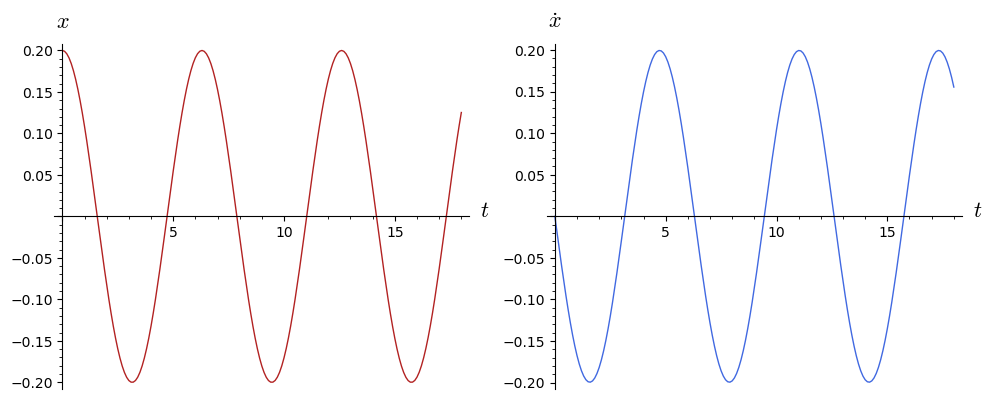

In [34]:
k = 1
VektorFeld = [y,-k*sin(x)]
#@interact # Kommentar entfernen für Interaktivität, produziert keine Vorschau im nbviewer, funktioniert in binder
#def plot_solution(t_1=18.0,x_0=slider(-4,4,0.1,default=0.2),v_0=slider(0,4,0.1,default=0,label='ẋ_0')):
def plot_solution(t_1=18.0,x_0=0.2,v_0=0):
    Anfangsbedingung = [0,RR(x_0),RR(v_0)] # Startzeit, Startauslenkung, Startgeschwindigkeit
    Endzeitpunkt=t_1
    NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
    GA = graphics_array([list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick),
    list_plot([(i,k) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$\\dot x$'],
              color=colors.royalblue)])
    GA.show(figsize=(10,4))
    # GA.save("pendel-oscillation.pdf",figsize=(10,4))
plot_solution() # Auskommentieren für Interaktivität

## Differentialgleichungssystem und Vektorfeld

Setzen wir $y=\dot x$, so erhalten wir
das 2-dimensionale Differentialgleichungssystem
\begin{align*}\dot x &= y,\\ \dot y &= -k\sin(x).\end{align*}

Die Abbildung $\mathbb{R} \mapsto \mathbb{R},\; \begin{pmatrix}x \\ y\end{pmatrix} \mapsto \begin{pmatrix} y \\ -k\sin(x)\end{pmatrix}$ definiert ein Vektorfeld.

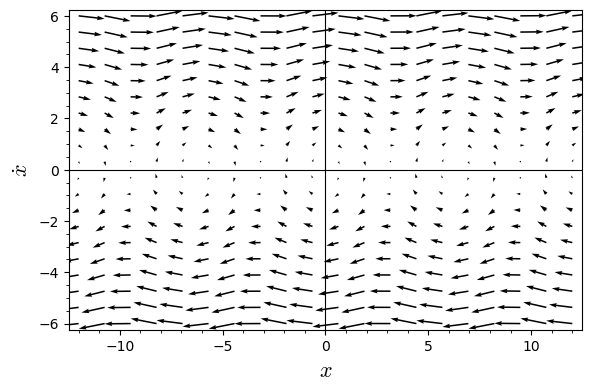

In [18]:
k = 1
VektorFeld = [y,-k*sin(x)]
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-6,6))
#FieldPlot.save("pendel-vektorfeld.pdf",axes_labels=['$x$', '$\\dot x$'])
FieldPlot.show(axes_labels=['$x$', '$\\dot x$'])

## Einige Lösungskurven

Lösungen des obigen Differentialgleichungssystems sind Kurven im $\mathbb{R}^2$, also Abbildungen der Form $I \to \mathbb{R}^2$ für ein Intervall $\mathbb{R}$. Die folgende Abbildung zeigt die **Bilder** einiger dieser Kurven.

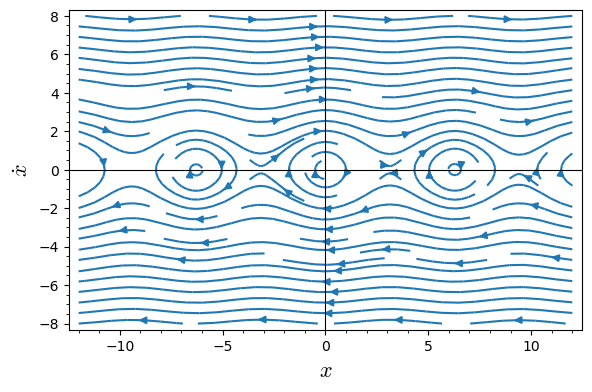

In [19]:
k = 1
VektorFeld = [y,-k*sin(x)]
StreamPlot = streamline_plot(VektorFeld, (x,-12,12), (y,-8,8)) #,color=(0.1,0.1,0.1,0.1))
StreamPlot.show(axes_labels=['$x$', '$\\dot x$'])

Betrachten wir noch einige Lösungen nahe dem Ursprung.

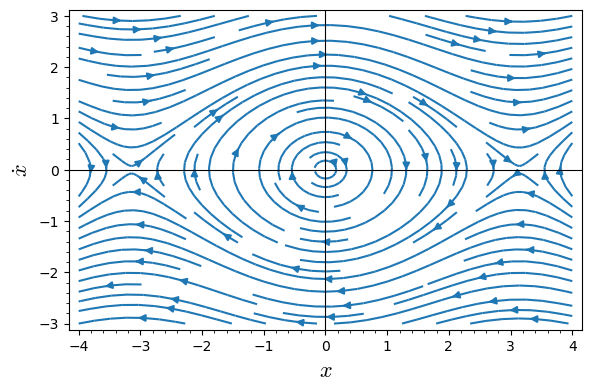

In [20]:
k = 1
VektorFeld = [y,-k*sin(x)]
StreamPlot = streamline_plot(VektorFeld, (x,-4,4), (y,-3,3))
StreamPlot.show(axes_labels=['$x$', '$\\dot x$'])

Diese Kurven sind tangential zum Vektorfeld.

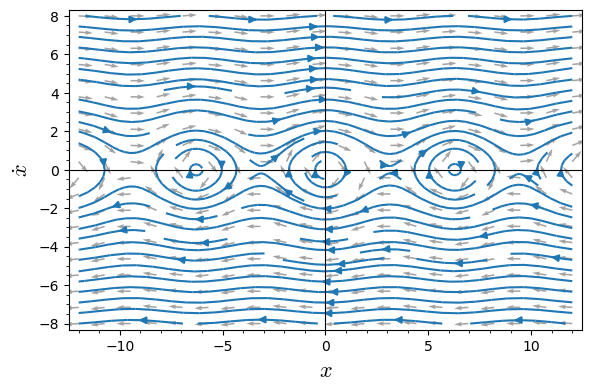

In [21]:
k = 1
VektorFeld = [y,-k*sin(x)]
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt = 9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
FieldPlot = plot_vector_field(vector(VektorFeld).normalized(),(x,-12,12),(y,-8,8),color=(0.4,0.4,0.4,0.6))
StreamPlot = streamline_plot(VektorFeld, (x,-12,12), (y,-8,8))
MainPlot =  StreamPlot + FieldPlot
# MainPlot.save_image("pendel-streamplot.pdf",axes_labels=['$x$', '$\\dot x$'])
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

Zur besseren Übersicht normieren wir noch die Vektoren des Vektorfeldes.

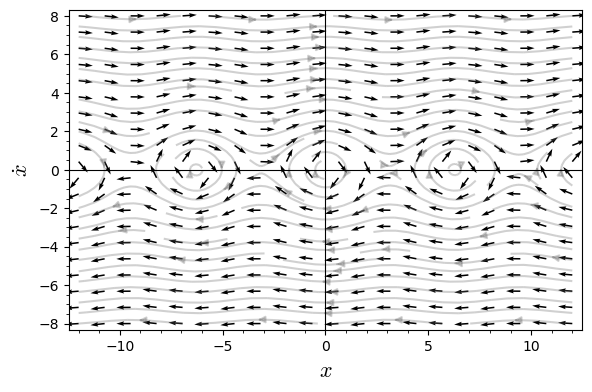

In [22]:
k = 1
VektorFeld = [y,-k*sin(x)]
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt = 9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
FieldPlot = plot_vector_field(vector(VektorFeld).normalized(),(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, (x,-12,12), (y,-8,8),color=(0.4,0.4,0.4,0.3))
MainPlot =  StreamPlot + FieldPlot
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

## Eine spezielle Lösung

Zunächst das Bild der Kurve.

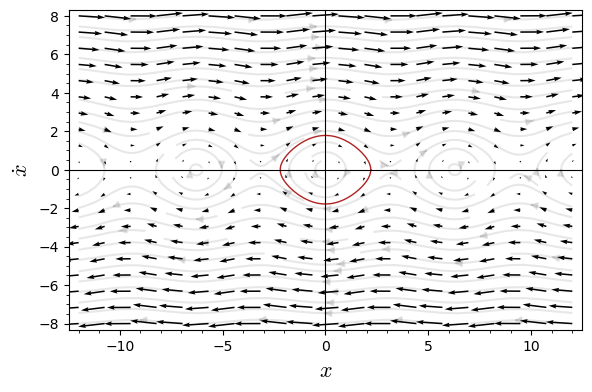

In [23]:
k = 1
VektorFeld = [y,-k*sin(x)]
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt = 9
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, (x,-12,12), (y,-8,8),color=(0.1,0.1,0.1,0.1))
MainPlot =  StreamPlot + FieldPlot + ParPlot
MainPlot.show(axes_labels=['$x$', '$\\dot x$'])

Wir können die Lösung auch animieren.

Animation with 91 frames
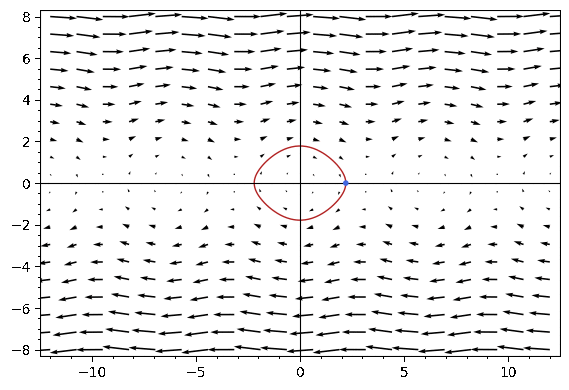

In [24]:
k = 1
VektorFeld = [y,-k*sin(x)]
frames=[FieldPlot + ParPlot + circle((x,y),0.1,fill=True,color=colors.royalblue) for (z,x,y) in NumSoln]
a=animate(frames)
a.show()

Die Taylorentwicklung von $\sin(x)$ in $0$ ergibt sich wie folgt:

In [25]:
taylor(sin(x),x,0,10)

1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x

Für kleine Auslenkungen $x$ können wir unsere Differentialgleichung also approximieren durch $\ddot x = -kx$,
oder als System ausgedrückt, 
\begin{align*}\dot x &= y,\\ \dot y &= -kx.\end{align*}

Für kleine Auslenkungen sind die Lösungen noch sehr ähnlich:

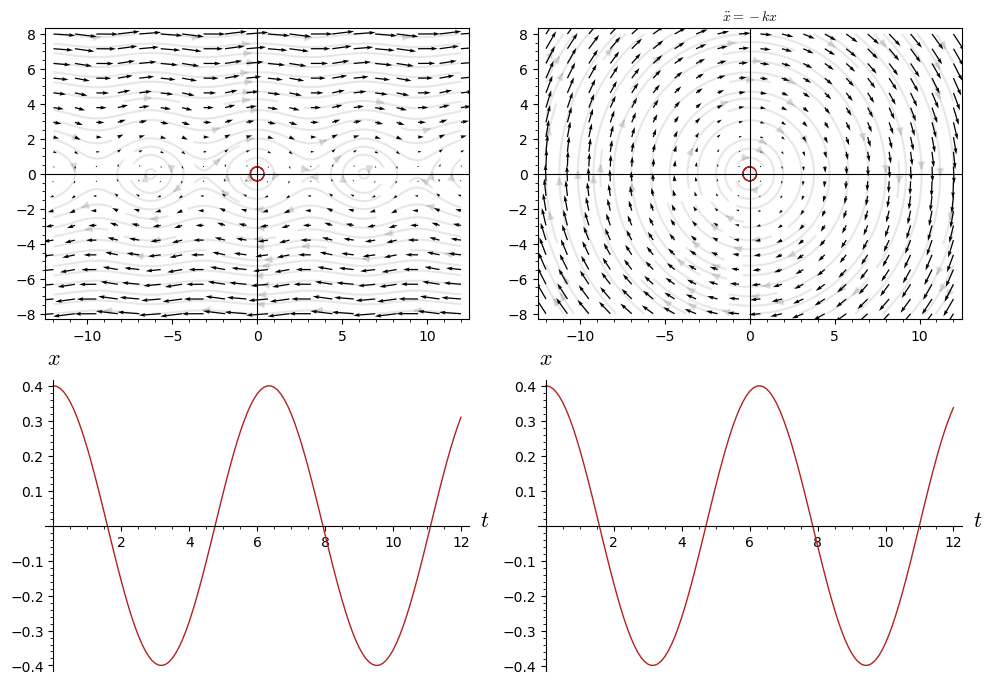

In [26]:
Anfangsbedingung = [0,0.4,0]
Endzeitpunkt = 12

VektorFeld = [y,-k*sin(x)]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(VektorFeld, 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k \\sin(x)$")
OrigVektorPlot =  StreamPlot + FieldPlot + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = [y,-k*x]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
LinVektorPlot =  StreamPlot + FieldPlot + ParPlot
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)
# LinVektorPlot.save("pendel-linearisierung.pdf")
graphics_array([OrigVektorPlot,LinVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))


Für große Auslenkungen eher nicht:

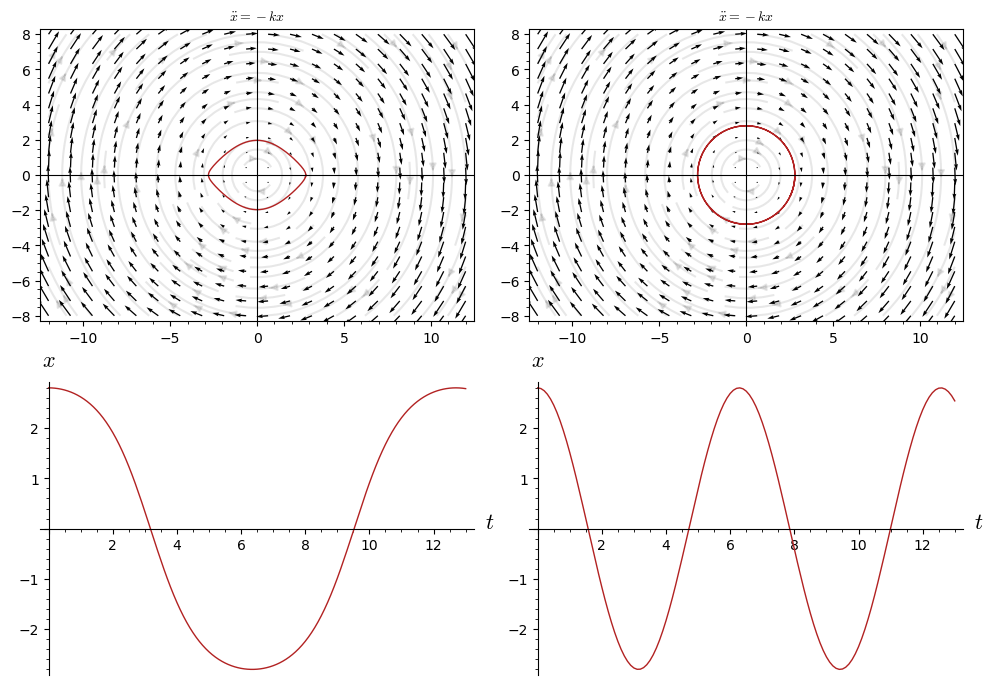

In [27]:
Anfangsbedingung = [0,2.8,0]
Endzeitpunkt = 13
k = 1

VektorFeld = [y,-k*sin(x)]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot2 = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot3 = streamline_plot(VektorFeld, 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k \\sin(x)$")
OrigVektorPlot =  StreamPlot + FieldPlot + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = [y,-k*x]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
LinVektorPlot =  StreamPlot + FieldPlot + ParPlot
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)

graphics_array([OrigVektorPlot,LinVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))

Eine bessere Approximation von $\sin(x)$ liefert eine bessere Approximation der Lösung auch für größere Auslenkungen.

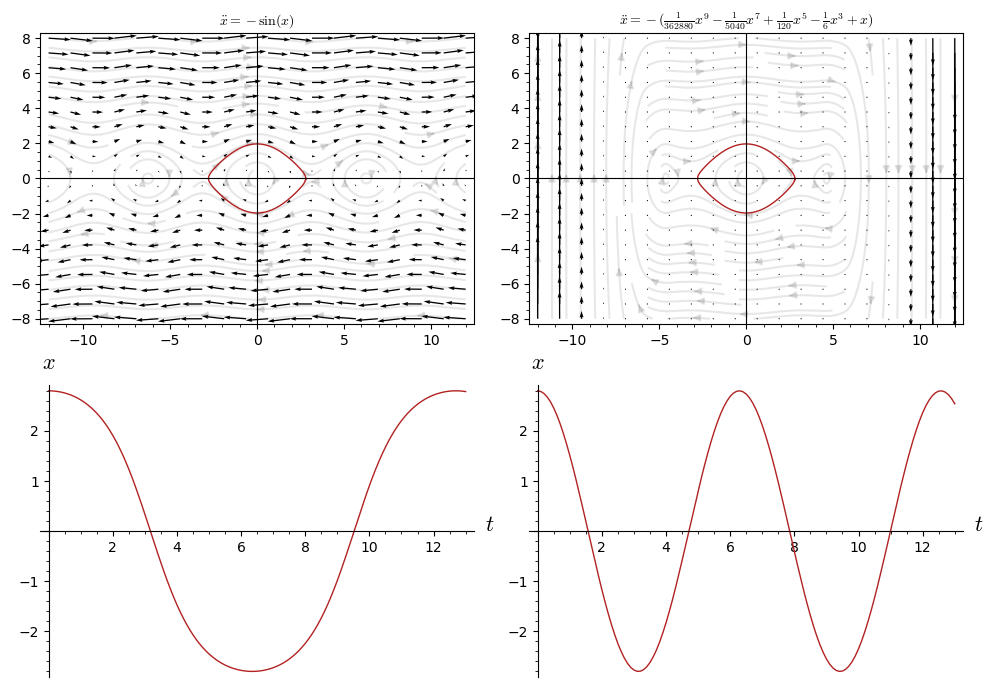

In [28]:
Anfangsbedingung = [0,2.8,0]
Endzeitpunkt = 13
k = 1

VektorFeld = [y,-k*sin(x)]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, 
                              (x,-12,12), 
                              (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -\\sin(x)$")
OrigVektorPlot =  StreamPlot + FieldPlot + ParPlot
OrigPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick,)

VektorFeld = [y,-k*(1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x)]
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -(\\frac{1}{362880}x^9 - \\frac{1}{5040}x^7 + \\frac{1}{120}x^5 - \\frac{1}{6}x^3 + x)$")
TayVektorPlot =  StreamPlot + FieldPlot + ParPlot
TayPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)

graphics_array([OrigVektorPlot,TayVektorPlot,OrigPlot,LinPlot],nrows=2).show(figsize=(10,7))

Eine Möglichkeit, die Reibung zu berücksichtigen, ist folgende Differentialgleichung:
\begin{align*}\ddot x = -k\sin(x)+c\dot{x}.\end{align*}.

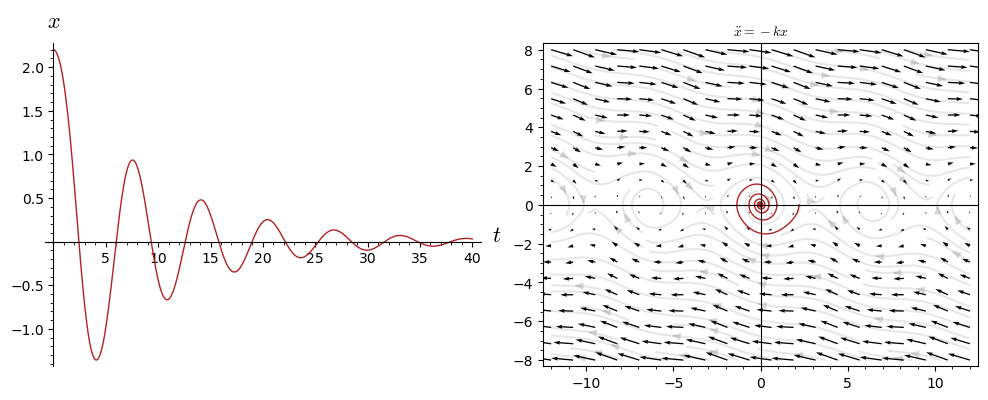

In [29]:
VektorFeld = [y,-k*sin(x)-0.2*y]
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt=40
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
GraphPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)
ParPlot = list_plot([[j,k] for i,j,k in NumSoln], plotjoined=true, color=colors.firebrick) 
FieldPlot = plot_vector_field(VektorFeld,(x,-12,12),(y,-8,8))
StreamPlot = streamline_plot(VektorFeld, 
                              (x,-12,12), (y,-8,8),
                              color=(0.1,0.1,0.1,0.1),
                              title="$\\ddot x = -k x$")
MainPlot =  StreamPlot + FieldPlot + ParPlot

GA = graphics_array([GraphPlot,MainPlot])
GA.save("pendel-gedaempft.pdf",figsize=(10,4))
GA.show(figsize=(10,4))

Fügt man jetzt noch eine periodische Anregung hinzu, erhält man eine nicht-autonome Differentialgleichung:

\begin{align*}\ddot x = -k\sin(x)+c\dot x+d \sin(t).\end{align*}.

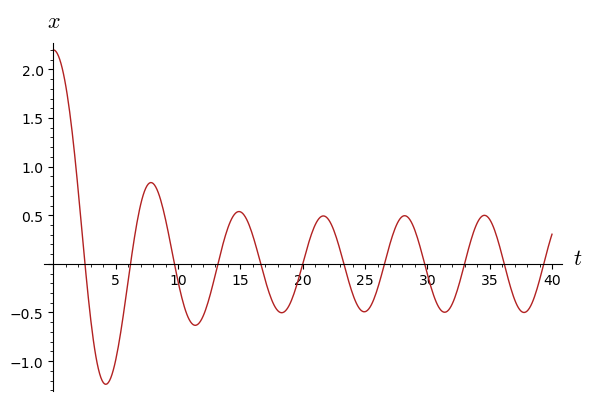

In [30]:
VektorFeld = vector([y,-k*sin(x)-0.2*y+0.1*sin(t)])
Anfangsbedingung = [0,2.2,0] # Startauslenkung, Startgeschwindigkeit, Startzeit
Endzeitpunkt = 40
 
NumSoln = desolve_system_rk4(VektorFeld, [x,y], ics=Anfangsbedingung, ivar=t, end_points=Endzeitpunkt)
LinPlot = list_plot([(i,j) for (i,j,k) in NumSoln],
              plotjoined=True,
              axes_labels=['$t$', '$x$'],
              color=colors.firebrick)
LinPlot.show()